<a href="https://colab.research.google.com/github/iresh-rajitha/Character-seperate-using-CV/blob/main/Character_seperate_using_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install opencv-python

In [2]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

In [3]:
# Upload the image file
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving 1.jpg to 1.jpg


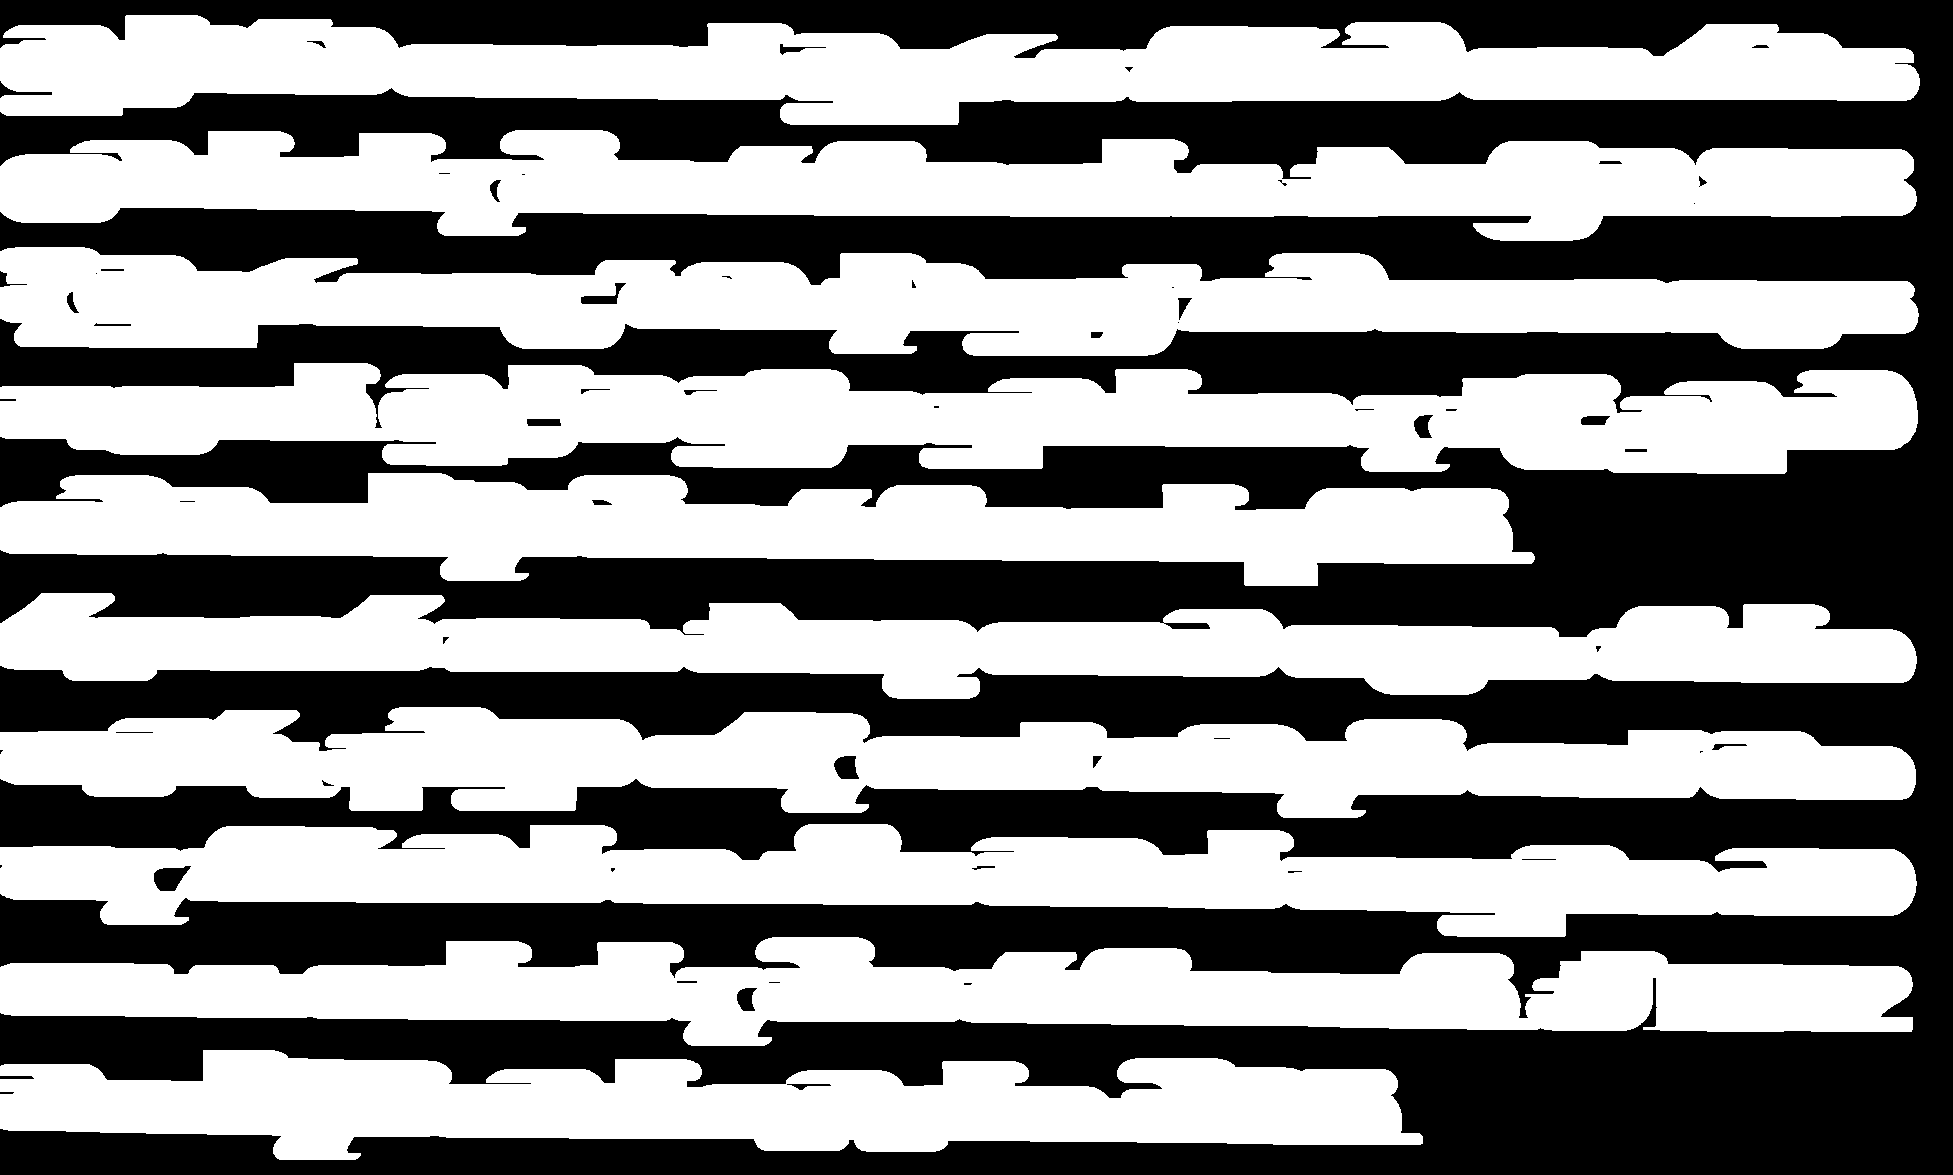

In [14]:
# prompt: I want to see segment in the image, can you draw green 1 pixel rectangle over the chracters

def segment_characters(image_path):

  # Load the image
  img = cv2.imread(image_path)

  # Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply thresholding
  ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

  rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (70, 3))
  dilation = cv2.dilate(thresh, rect_kernel, iterations = 1)
  cv2_imshow(dilation)

  # Find contours
  contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Sort contours by x-coordinate
  contours = sorted(contours, key=lambda ctr: (cv2.boundingRect(ctr)[1], cv2.boundingRect(ctr)[0]))

  # Segment characters
  segmented_chars = []
  prev_x = 0
  word_start_point_x = 0
  word_start_point_y = 0
  for index,cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
    # Draw green rectangle
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(img, str(index), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    prev_x = x


  return segmented_chars, img

# Example usage
segmented_chars, result_img = segment_characters(image_path)

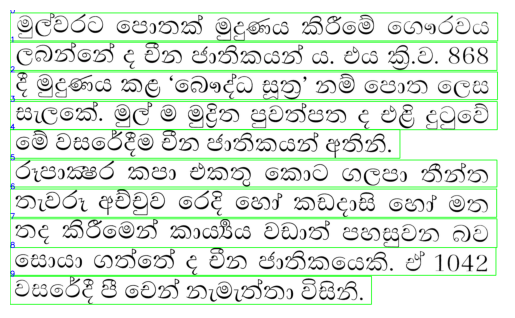

In [15]:
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.savefig("result.png")
plt.axis('off')
plt.show()